In [1]:
from datasets import load_dataset

c:\Users\Antoi\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
openweb=load_dataset("Skylion007/openwebtext")

In [3]:
openweb.shape 

{'train': (8013769, 1)}

In [4]:
import torch.nn as nn 
import torch.nn.functional as F
import torch
import matplotlib.pyplot as plt

In [5]:
words=open("names.txt").read().splitlines()

In [6]:
chars=sorted(list(set("".join(words))))
stoi={s: i+1 for i,s in enumerate(chars)}
stoi['.']=0


itos={i:s for s,i in stoi.items()}
encode= lambda s : [stoi[c] for c in s] #-->int
decode=lambda i :  "".join([itos[x] for x in i  ])


itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [59]:
### build the dataset 

block_size=3
X,Y=[],[]

for w in words:
    context=[0] * block_size
    for ch in w+ '.' :
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
        # print("".join([itos[i] for i in context])," gives ","".join(itos[ix]))
        context=context[1:]+ [ix]

X=torch.tensor(X)
Y=torch.tensor(Y)
print(X.shape)

torch.Size([228146, 3])


In [105]:
def build_dataset(words) :
    block_size=3
    X,Y=[],[]

    for w in words:
        context=[0] * block_size
        for ch in w+ '.' :
            ix=stoi[ch]
            X.append(context)
            Y.append(ix)
            # print("".join([itos[i] for i in context])," gives ","".join(itos[ix]))
            context=context[1:]+ [ix]

    X=torch.tensor(X)
    Y=torch.tensor(Y)
    print(X.shape)
    return X,Y

import random 
random.seed(42)
random.shuffle(words)
n1=int(0.8*len(words))
n2=int(0.9*len(words))

Xtr,Ytr=build_dataset(words[:n1])
Xdev,Ydev=build_dataset(words[n1:n2])
Xte,Yte=build_dataset(words[n2:])

torch.Size([182580, 3])
torch.Size([22767, 3])
torch.Size([22799, 3])


In [9]:
# F.one_hot(torch.tensor(5),num_classes=27).float() @ C ###C(5)


tensor([-0.0416,  0.6228])

In [133]:
g=torch.Generator().manual_seed(2147483647)
C=torch.randn((27,10))
W1=torch.randn((30,200),generator=g)
b1=torch.randn(200,generator=g)
W2=torch.randn((200,27),generator=g)
b2=torch.randn(27,generator=g)
parameters=[C,W1,b1,W2,b2]

In [134]:
for p in parameters:
    p.requires_grad=True

In [135]:
lre=torch.linspace(-3,0,1000)
lrs=10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [138]:
lri=[]
lossi=[]
stepi=[]


In [140]:
###Backward pass
for i in range(30000) :

    #mini batch construct
    ix=torch.randint(0,Xtr.shape[0],(32,),generator=g )


    emb=C[Xtr[ix]]
    H,W,CH=emb.shape

    #forward pass
    h=torch.tanh(emb.view(H,W*CH) @ W1 +b1) ##broadcasting
    logits=h@W2 +b2
    loss=F.cross_entropy(logits,Ytr[ix])
    # print(loss.item())
    for p in parameters :
        p.grad=None
    loss.backward()

    ##update

    # lr=lrs[i]
    lr=0.1
    for p in parameters :
        p.data+=-lr*p.grad
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())



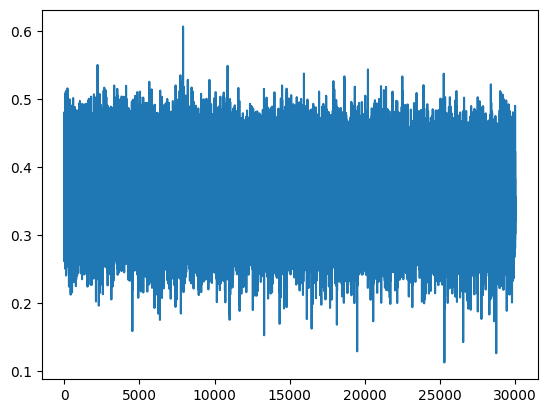

In [141]:
plt.plot(stepi,lossi)

In [113]:
loss.item()

2.6055212020874023

In [131]:
emb=C[Xdev]
H,W,CH=emb.shape
h=torch.tanh(emb.view(H,W*CH) @ W1 +b1) ##broadcasting
logits=h@W2 +b2
loss=F.cross_entropy(logits,Ydev)
loss.item()

2.551612615585327

In [ ]:
#train/val/test
80/10/10

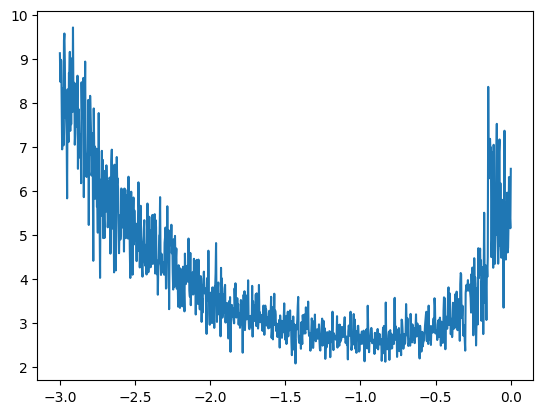

In [89]:
plt.plot(lri,lossi)